<a href="https://www.kaggle.com/code/abhikuks/step-by-step-analysis-for-absolute-beginners?scriptVersionId=99855068" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Let's understand the data
So you must how to understand it ? The answer is by getting the gist of it , 
The first thing I think about is how big is the data?

In [2]:
# Importing the 
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')

### Generally people go for 
* head() for first five rows(nrows) of data
* tail() for last five rows(nrows) of data 
> But I feel like we should use .sample() as it gives us trustworthy information about data , using the above can sometimes make our thinking biased towards some features , however sample randomly picks nrows of data mentioned from data which we can easily look in the below code,like in head there is no value for Parch(Parent Children ) so we can create a biased approach in our analysis [It could happen sometimes so for that always run sample and tail methods as well]

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


# Lets tackle Some Questions 
* How big is the data ? df.shape
* How does the data look ? df.sample() 
* What are the data type of the columns ? df.info()
* Are there any missing values ? df.isna().sum // df.isnull().sum()
* Are there duplicated rows ? df.duplicated().sum()
* How does the Data look numerically ?? df.describe()
* How is the correlation between columns ? df.corr()

In [6]:
titanic.shape  # 891 rows * 12 columns

(891, 12)

In [7]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**So we can see that titanic training dataset consists of 891 rows and 12 columns
and cleary from the info() method we can state that there are some missing values in Age , Cabin & Embarked"**

In [10]:
# Numerical Information about the whole data, this can be useful for numerical data;
# like here we can look specifically into Age
titanic.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

***We can see here that the average age comes out to be approximately 29~30 and from percentiles we can say there are 25% of people having age less than that of 20 and corresponding for other percentiles.***

In [11]:
titanic.corr()['Survived'] ## calculating the correlation {here it uses PCC [pearson correlation Coefficient]}

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

***So we can see there is strong positive correlation of Survived with Fare which means if Fare is increasing ,then the survivability chances are also going to increase, wherease if we look to Pclass it is having a negative strong correlation with Survived , so here if the Pclass is increasing then the survival chances are getting less(as Pclass =3  most people died , we'll see that as well)***

## **Analyzing Various Features to see whether they're useful or not**

# Univariate Analysis

***Now,before deep diving into univariate analysis, we need to understand what kind of data we're handling, there are two type of data which are as follows:***
1. Numerical Data
2. Categorical data

***Features in Titanic Data***
* numerical data here is : Age , Fare ,PassengerID(useless)
* categorical Data : Survived , Pclass ,Sex , Embarked

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Categorical Data

0    549
1    342
Name: Survived, dtype: int64


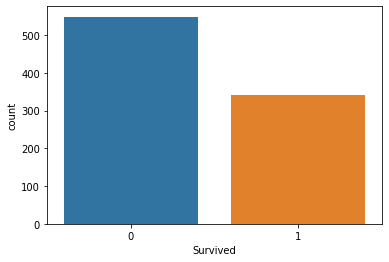

3    491
1    216
2    184
Name: Pclass, dtype: int64


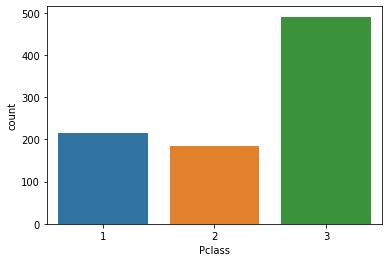

male      577
female    314
Name: Sex, dtype: int64


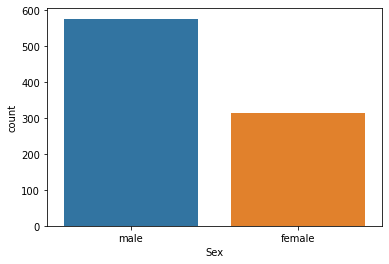

S    644
C    168
Q     77
Name: Embarked, dtype: int64


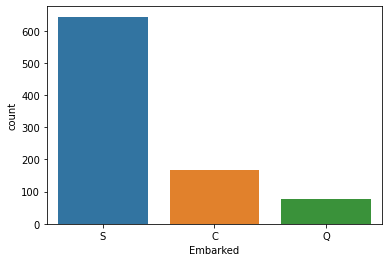

<Figure size 432x288 with 0 Axes>

In [13]:
# countplot

survived = titanic['Survived']
pclass = titanic['Pclass']
gender = titanic['Sex']
station = titanic['Embarked']

l = [survived ,pclass , gender ,station]

for i in range(len(l)):
    print(l[i].value_counts()) # counting the values 
    sns.countplot(x = l[i]) #ploting them byh iterating over list
    plt.show()
    plt.clf() # #The clf() function of pyplot module is used to clear the current figure.
    

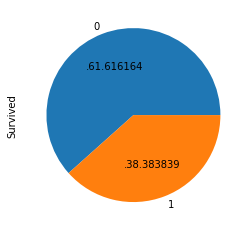

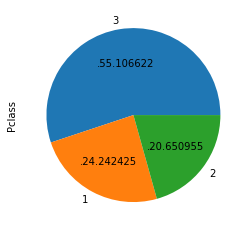

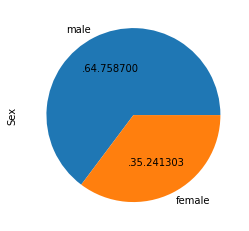

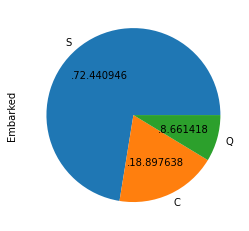

<Figure size 432x288 with 0 Axes>

In [14]:
#pie chart
for i in range(len(l)):
    l[i].value_counts().plot(kind = 'pie' ,autopct = '.%2f')
    plt.show()
    plt.clf()

***So I did plot pie chart because in this we are getting the percentages , which is considered to be a richer information then that of raw numbers which we got in countplot.***

## Numerical Data

<AxesSubplot:xlabel='Age', ylabel='Count'>

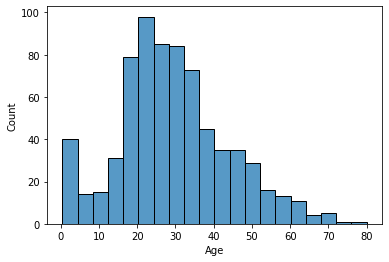

In [15]:
# histogram 
sns.histplot(x = titanic['Age'])

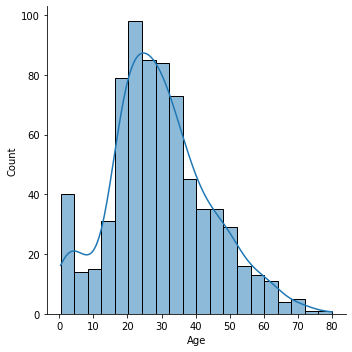

<AxesSubplot:xlabel='Age', ylabel='Density'>

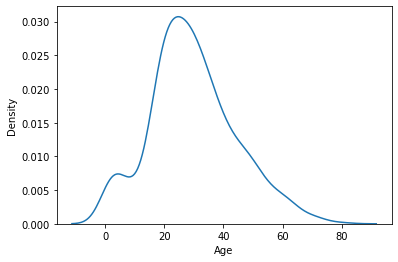

In [16]:
#distplot/ kdeplot
sns.displot(x = titanic['Age'], kde = True)
plt.show()
plt.clf()
sns.kdeplot(x = titanic['Age'])

<AxesSubplot:xlabel='Age'>

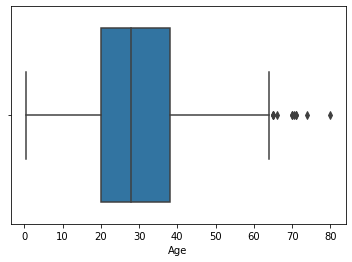

In [17]:
sns.boxplot(x = titanic['Age'])

# Multivariate Analysis

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

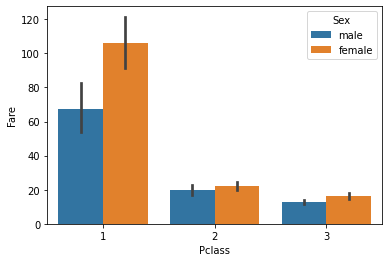

In [18]:
# Barplot(Numerical - Categorical)
p_class = titanic['Pclass']
age = titanic['Age']
fare = titanic['Fare']
gender = titanic['Sex']
sns.barplot(x = p_class , y =fare , hue = gender)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

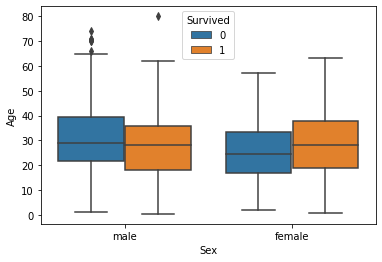

In [19]:
# Boxplot(Numerical - Categorical)
sns.boxplot(x = gender , y =age , hue = survived)

<AxesSubplot:xlabel='Age', ylabel='Density'>

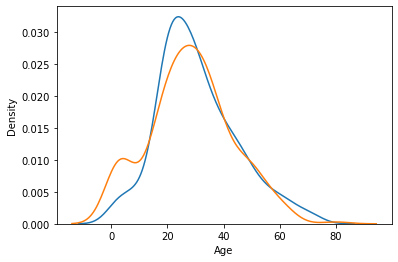

In [20]:
# kdeplot
not_survived_age = titanic['Survived'] == 0
survived_age = titanic['Survived'] == 1
sns.kdeplot(titanic[not_survived_age]['Age'])
sns.kdeplot(titanic[survived_age]['Age'])

* **So we can see that the females always paid much more fair regardless of the Pclass they're travelling in and Pclass 1 is expensive; similarly we can work through multiple combinations here using hue feature .**
* **In Boxplot, We can see more female survivors than male**
* **In kde plot,we can see great insights that is the surviving chances of baby/newborn is much higer than to dying; Secondly ,the age group between 15-30 have higher chances of death than survival.**

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

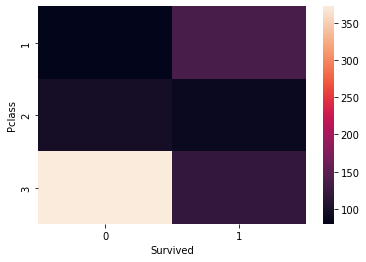

In [21]:
# Heatmap (Categorical - Categorical Data)
crosstab_data =pd.crosstab(titanic['Pclass'] , titanic['Survived'])
print(crosstab_data)
sns.heatmap(crosstab_data )

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


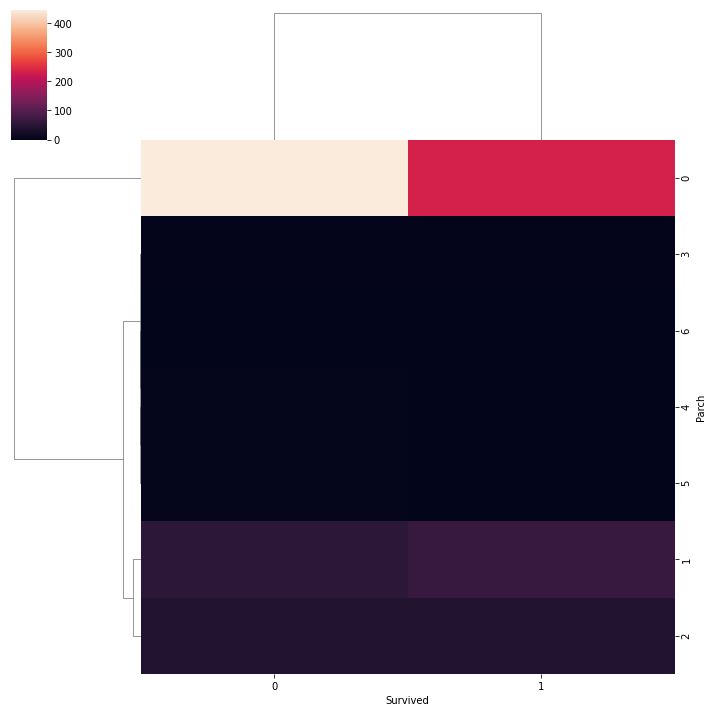

In [22]:
# Cluster Map (Categorical -Categorical)
parch_survival= pd.crosstab(titanic['Parch'] ,titanic['Survived'])
print(parch_survival)
sns.clustermap(parch_survival)

In [23]:
titanic.groupby('Embarked').mean()['Survived']*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [24]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [25]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
